This notebook demonstrates the `Site_Factors` class. This class implements the nonlinear site factors for the Western United States, developed by J. Shi, D. Asimaki, and R. Graves in 2019.

(_This notebook takes about 5 minutes to read through._)

# 1. Initializing a `Site_Factors` object

To do so, we need the following information:

- $V_{30}$ of the site of interest
- $z_1$ (the basin depth) of the site of interest; if it is unknown, we recommend using the empirical formula below to infer it
- PGA (peak ground acceleration) of the motion on the rock outcrop site; the rock outcrop site needs to have a $V_{S30}$ of 1,046 m/s

In [1]:
from PySeismoSoil.class_site_factors import Site_Factors

In [2]:
Vs30 = 247  # unit: m/s
z1 = 169  # unit: m
PGA = 0.93  # unit: g
site_factors = Site_Factors(Vs30, z1, PGA)

# 2. Querying site amplification factors

Site amplification factors describe how much the input ground motion is amplified by the soil site at different frequencies.

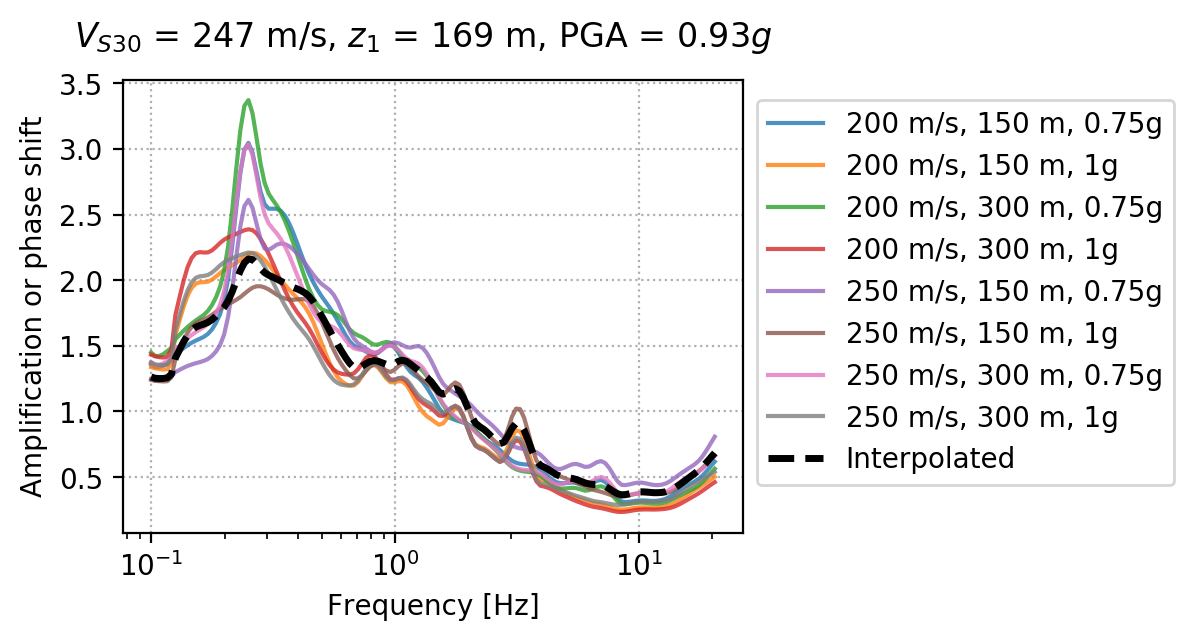

In [3]:
method = 'nl_hh'  # the other option: 'eq_hh' --- results calculated by the equivalent linear method (not recommended)
use_Fourier = True  # if True, Fourier-based factors; if False, get response-spectra-based factors
ampl_factor = site_factors.get_amplification(method=method, Fourier=use_Fourier, show_interp_plots=True)

The dashed black line ("interpolated") shown above is the amplification factor returned. The figure above shows how `PySeismoSoil` interpolates the pre-calculated amplification factors at the discrete "grid points" of ($V_{S30}$, $z_1$, PGA), and obtain the desired amplification factors.

`ampl_factor` is an object of the `Frequency_Spectrum` class. For more information of this class, see its [documentation](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_frequency_spectrum.html) and [examples](./Demo_03_Frequency_Spectrum.ipynb).

In [4]:
type(ampl_factor)

PySeismoSoil.class_frequency_spectrum.Frequency_Spectrum

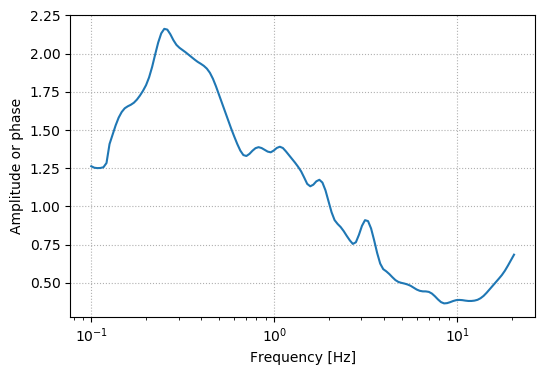

In [5]:
ampl_factor.plot();

# 2. Querying phase-shift factors

Phase-shift factors describe how much delay (between the output and input ground motions) at different frequencies is introduced by the soil site.

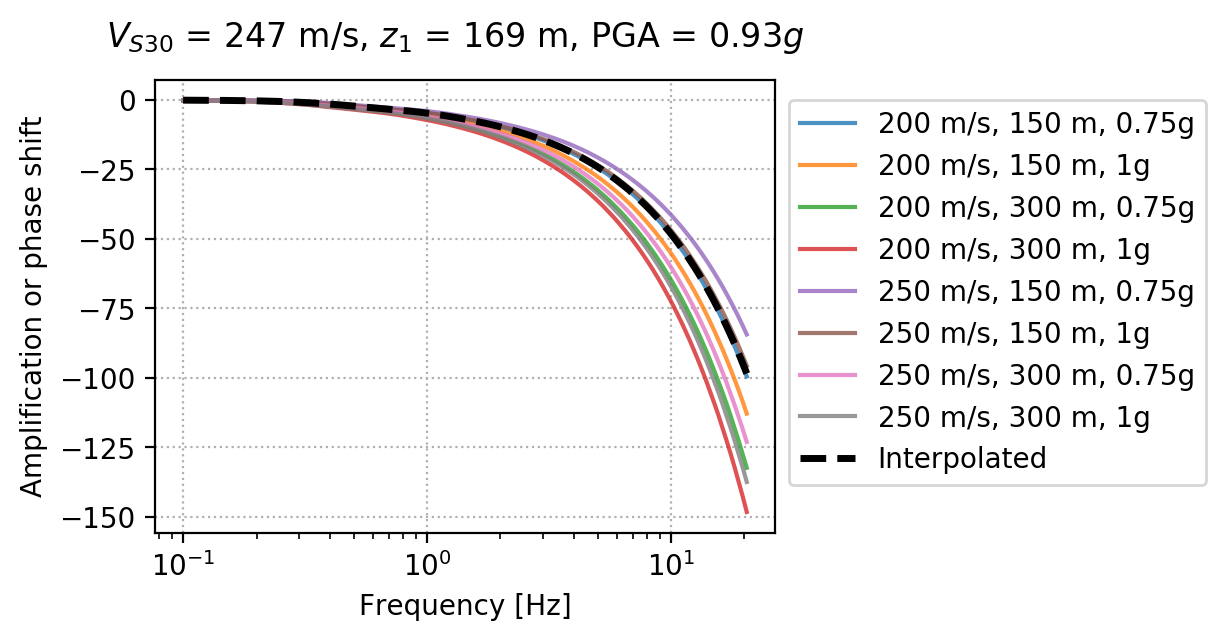

In [6]:
method = 'eq_hh'  # currently, the only option is 'eq_hh'
phase_factor = site_factors.get_phase_shift(method=method, show_interp_plots=True)

In [7]:
type(phase_factor)

PySeismoSoil.class_frequency_spectrum.Frequency_Spectrum

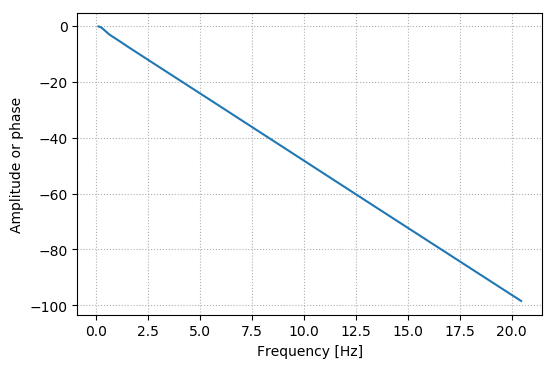

In [8]:
phase_factor.plot(logx=False);

The users can also query the amplification and phase at the same time with the `get_both_amplf_and_phase()` method.